In [36]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, sum
from pyspark.sql.functions import col, floor
from pyspark.sql.functions import col, avg, count, stddev
from pyspark.sql.functions import when
from pyspark.sql.functions import col, avg, count, stddev, sqrt, pow
import seaborn as sns

In [37]:
spark = SparkSession.builder \
    .appName("BostonHousingAnalysis") \
    .config("spark.driver.memory", "2g") \
    .config("spark.executor.memory", "2g") \
    .getOrCreate()

bostonhousing = spark.read.csv("C:/Users/elvis/Documents/NEU STUDIES FOLDER/ALY6110/BostonHousing.csv", header=True, inferSchema=True, encoding="UTF-8")
bostonhousing.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

In [38]:
# Drop rows with any null values
bostonhousing = bostonhousing .dropna()

In [44]:
##checking for rows with na values
na = bostonhousing .select([sum(col(c).isNull().cast("int")).alias(c) for c in bostonhousing .columns])
na.show()

+----+---+-----+----+---+---+---+---+---+---+-------+---+-----+----+
|crim| zn|indus|chas|nox| rm|age|dis|rad|tax|ptratio|  b|lstat|medv|
+----+---+-----+----+---+---+---+---+---+---+-------+---+-----+----+
|   0|  0|    0|   0|  0|  0|  0|  0|  0|  0|      0|  0|    0|   0|
+----+---+-----+----+---+---+---+---+---+---+-------+---+-----+----+



In [45]:
# Create bins for the average number of rooms using a different method
bostonhousing= bostonhousing.withColumn("RM_bin", floor(bostonhousing["RM"]))
bostonhousing.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+------+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|RM_bin|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+------+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|     6|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|     6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|     7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|     6|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|     7|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|     6|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|     6|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|2

In [46]:
# Define bins for RM using a round and a different method
bostonhousing = bostonhousing .withColumn(
    "RM_bin",
    when(col("RM") <= 4, "<= 4")
    .when((col("RM") > 4) & (col("RM") <= 6), "4-6")
    .when((col("RM") > 6) & (col("RM") <= 8), "6-8")
    .otherwise("> 8"))

# Show the data with the new RM_bin column
bostonhousing.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+------+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|RM_bin|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+------+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|   6-8|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|   6-8|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|   6-8|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|   6-8|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|   6-8|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|   6-8|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|   6-8|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|2

In [47]:
# Calculate total sum and count for mean calculation
sum_count_stats = bostonhousing.groupBy("RM_bin").agg(
    sum(col("MEDV")).alias("sum_MEDV"),
    count(col("MEDV")).alias("count"))


In [48]:
# Calculate mean
mean_stats = sum_count_stats.withColumn("avg_MEDV", col("sum_MEDV") / col("count"))

In [49]:
# Calculate standard deviation
variance_stats =bostonhousing.join(mean_stats, on="RM_bin").groupBy("RM_bin").agg(
    sum(pow(col("MEDV") - col("avg_MEDV"), 2)).alias("sum_squared_diff")
)

stddev_stats = variance_stats.join(mean_stats, on="RM_bin").withColumn(
    "stddev_MEDV", sqrt(col("sum_squared_diff") / col("count"))
).select("RM_bin", "avg_MEDV", "count", "stddev_MEDV")

# Show the statistics for each bin
stddev_stats.show()

+------+------------------+-----+------------------+
|RM_bin|          avg_MEDV|count|       stddev_MEDV|
+------+------------------+-----+------------------+
|   6-8|24.390937499999996|  320| 8.694291179911895|
|  <= 4|              25.3|    2|2.1999999999999993|
|   4-6|17.376023391812865|  171| 5.904310892099426|
|   > 8|              44.2|   13| 7.774910338340293|
+------+------------------+-----+------------------+



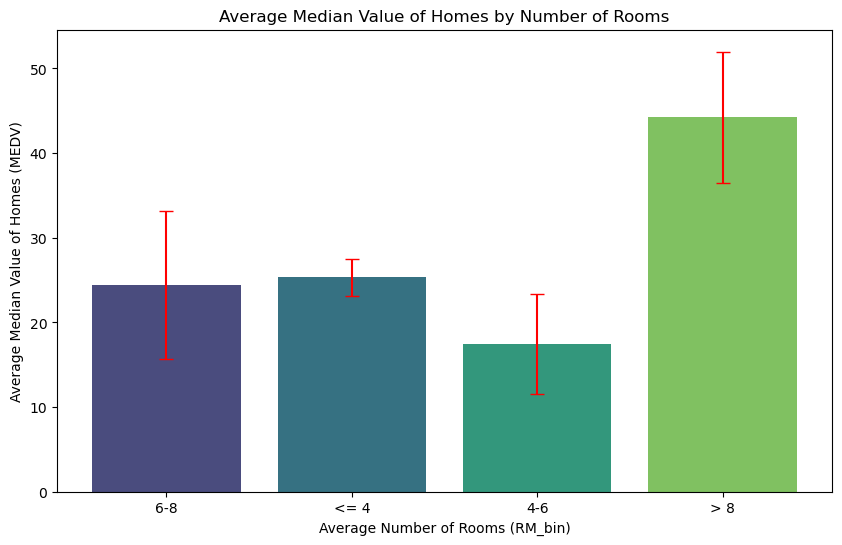

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the Spark DataFrame to Pandas DataFrame
stddev_stats_pd = stddev_stats.toPandas()

# Plot the data using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="RM_bin", y="avg_MEDV", data=stddev_stats_pd, capsize=0.2, palette="viridis")
plt.errorbar(x=stddev_stats_pd["RM_bin"], y=stddev_stats_pd["avg_MEDV"], yerr=stddev_stats_pd["stddev_MEDV"], fmt='none', c='r', capsize=5)
plt.xlabel("Average Number of Rooms (RM_bin)")
plt.ylabel("Average Median Value of Homes (MEDV)")
plt.title("Average Median Value of Homes by Number of Rooms")
plt.show()


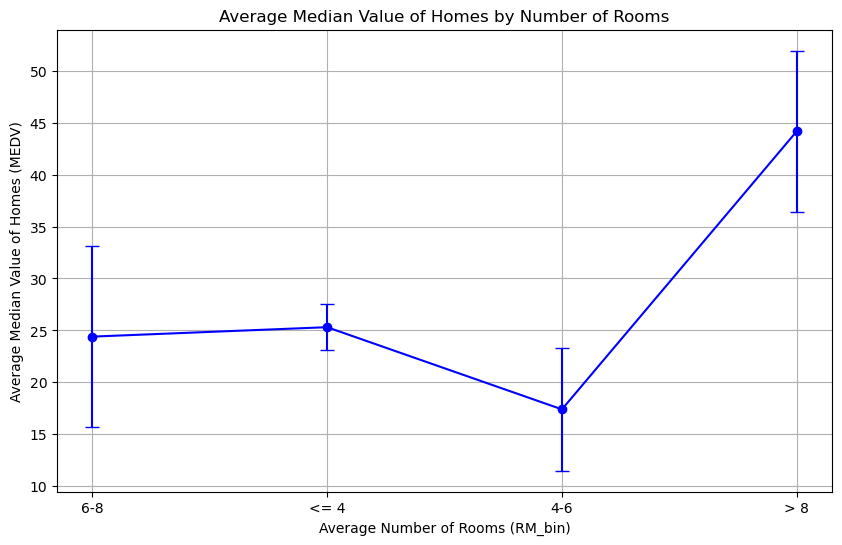

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the Spark DataFrame to Pandas DataFrame
stddev_stats_pd = stddev_stats.toPandas()

# Plot the data using seaborn with a line chart
plt.figure(figsize=(10, 6))
plt.errorbar(x=stddev_stats_pd["RM_bin"], y=stddev_stats_pd["avg_MEDV"], yerr=stddev_stats_pd["stddev_MEDV"], fmt='-o', capsize=5, color='b')
plt.xlabel("Average Number of Rooms (RM_bin)")
plt.ylabel("Average Median Value of Homes (MEDV)")
plt.title("Average Median Value of Homes by Number of Rooms")
plt.grid(True)
plt.show()
